# Part II - Factors affecting bike sharing: A case study of Ford GoBike Share 

## by Emenike Goodluck


## Investigation Overview


> I was interested to find out when are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer? And how the trip is affected based on the user type, age and gender.



## Dataset Overview

> There are 183412 riders recorded in the Ford GoBike Share dataset with 17 columns of which `start time`, `duration_sec`, `birth_year`, and `bike_share_for_all_trip` are important columns for this analysis. After cleaning the dataset I analyzed 174952 riders which represent 95% of the original dataset. The following additional columns - `distance_meters`, `speed_mps`, `hour`, `day`, and `day_name` were created to aid the analysis.

> The users are categorized as either `customer` or `subscriber`

> Three genders participated `male`, `female` and `other` and some participants shared their rides during the trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_rides_data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps,day,day_name,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,544.708503,0.010438,28,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,2704.545131,0.043725,28,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30,260.738544,0.007145,28,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,2409.301416,1.520064,28,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,60,3332.202628,1.858451,28,Thursday,23


In [3]:
# Numeric and Categoric variables
numeric_vars = ['duration_sec','member_age','distance_meters','speed_mps']
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip']

In [4]:
# Function that labels a chart
def label_chart(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## Most of the participants are below 40 years old 

> Most of the participants are between the ages of 25 and 35. 

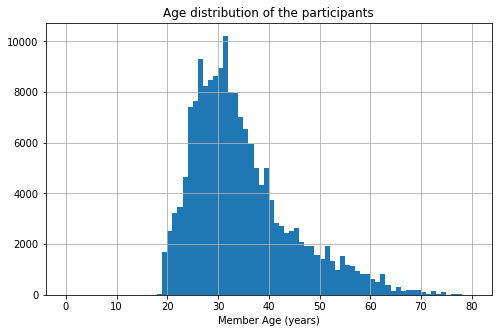

In [5]:
# Histogram plot of the participants age
bin_size = 1
bins = np.arange(0, df['member_age'].max()+bin_size, bin_size)

plt.figure(figsize=[8, 5])
df['member_age'].hist(bins = bins)
plt.xlabel('Member Age (years)')
plt.title('Age distribution of the participants')
plt.show()

## Gender distribution

> Majority of the participants are male

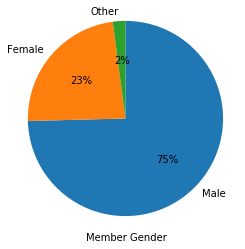

In [6]:
# Pie plot of the member gender
column = df['member_gender'].value_counts()
plt.pie(column, labels = column.index, startangle = 90, 
        counterclock = False,autopct='%.0f%%');
plt.axis('square');
plt.xlabel('Member Gender');

## Most of the trips were made at 08 hrs and 17 hours most of the days

> Of the days of the month, day 28 at 08hrs had the highest number of participants. Also, most of the rides were made at 08 hrs and 17 hrs everyday.

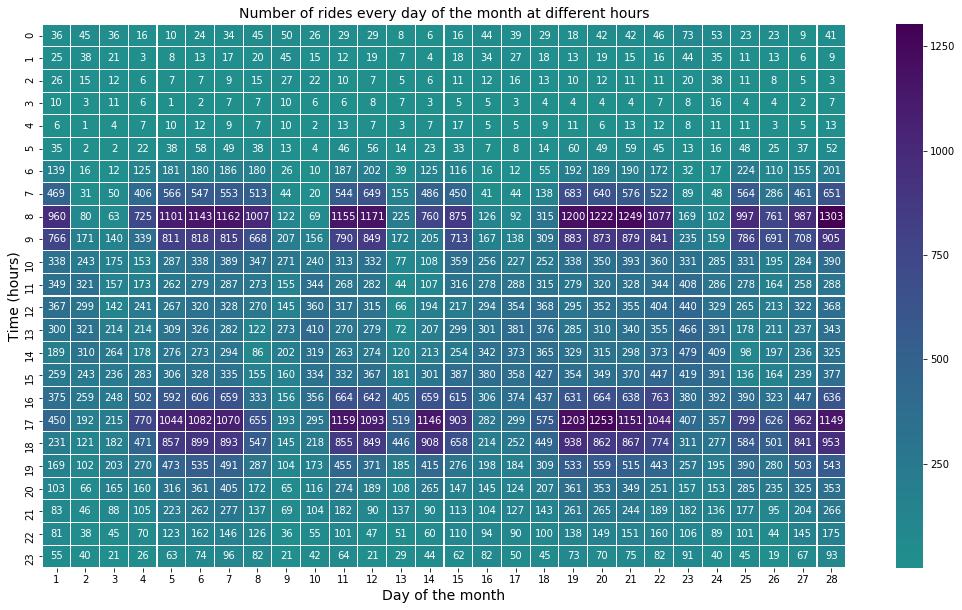

In [7]:
# Plot heatmap of the days and hours
hour_day = df.groupby(['hour','day']).size()
hour_day = hour_day.reset_index(name = 'count')
hour_day = hour_day.pivot(index = 'hour', columns = 'day', values = 'count')
plt.figure(figsize = [18, 10])
sb.heatmap(hour_day,annot = True,cmap = 'viridis_r', center = 0, linewidth=.1,fmt='d');
plt.title('Number of rides every day of the month at different hours',fontsize=14);
plt.xlabel('Day of the month',fontsize=14)
plt.ylabel('Time (hours)',fontsize=14);


## Saturdays and Sundays had the least amount of rides

>  Most of the trips was taken on Thursdays at 17 hrs. Of all the days of the week, Saturdays and Sundays had the least number of participants and more participants turned up on weekdays.

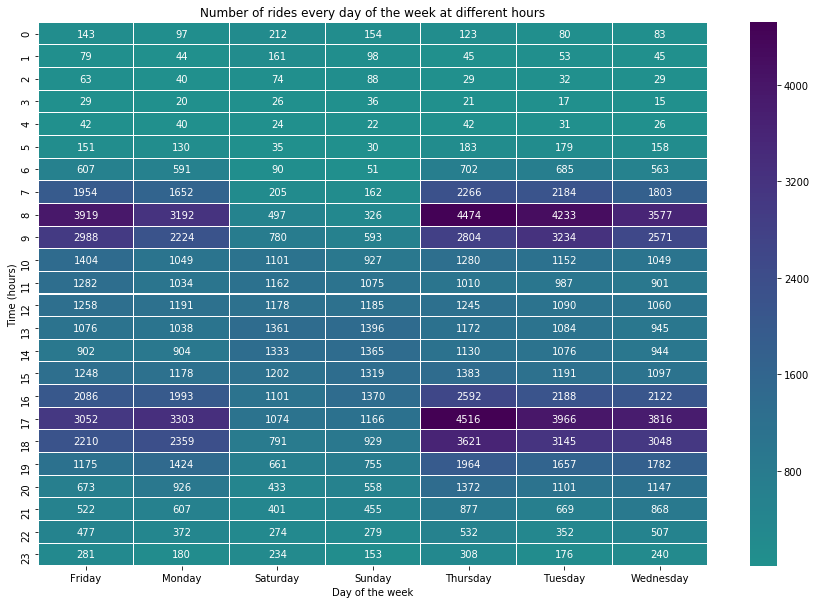

In [8]:
# Plot heatmap of the days name and hours
hour_dayName = df.groupby(['hour','day_name']).size()
hour_dayName = hour_dayName.reset_index(name = 'count')
hour_dayName = hour_dayName.pivot(index = 'hour', columns = 'day_name', values = 'count')
plt.figure(figsize = [15, 10])
sb.heatmap(hour_dayName,annot = True,cmap = 'viridis_r', center = 0, linewidth=.1,fmt='d');
plt.title('Number of rides every day of the week at different hours');
plt.xlabel('Day of the week')
plt.ylabel('Time (hours)');

## Customers did not share their rides and younger subscribers shared their rides more

> None of the customers shared their rides. Most of the subscribers that shared their rides are young compared to the ones that did not share their rides.

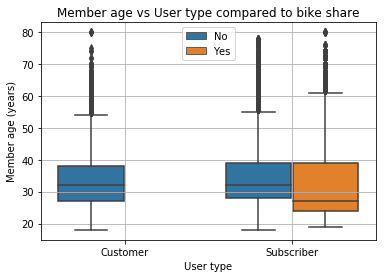

In [9]:
# Boxplot of user type, member age and bike share
sb.boxplot(data = df, x = 'user_type', y = 'member_age',
           hue='bike_share_for_all_trip');
plt.legend(loc='upper center')
plt.grid()
label_chart('User type', 'Member age (years)',
            'Member age vs User type compared to bike share')

## Customers travelled for a longer time more than subscribers.

> An average trip takes between 400 to 900 seconds. Customers travelled longer than subscribers. Those who did not share their rides travelled longer than those who shared their rides. Since customers did not share their rides, they travelled longer period than subscribers.

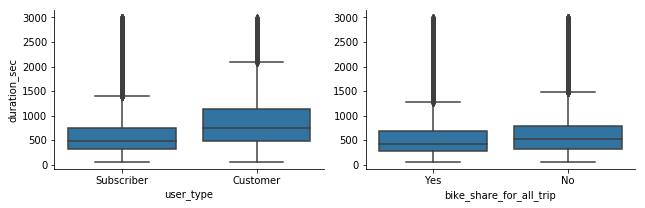

In [10]:
# plot matrix of numeric features against categorical features.
sample_df = df.query('duration_sec<3000')


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color);

g = sb.PairGrid(data = sample_df, y_vars = ['duration_sec'], 
                x_vars = ['user_type','bike_share_for_all_trip'],
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

## The duration, distance and speed of the ride is not dependent on the rider's age

> There is no correlation between participants' age and duration, distance travelled or speed of the rider. 

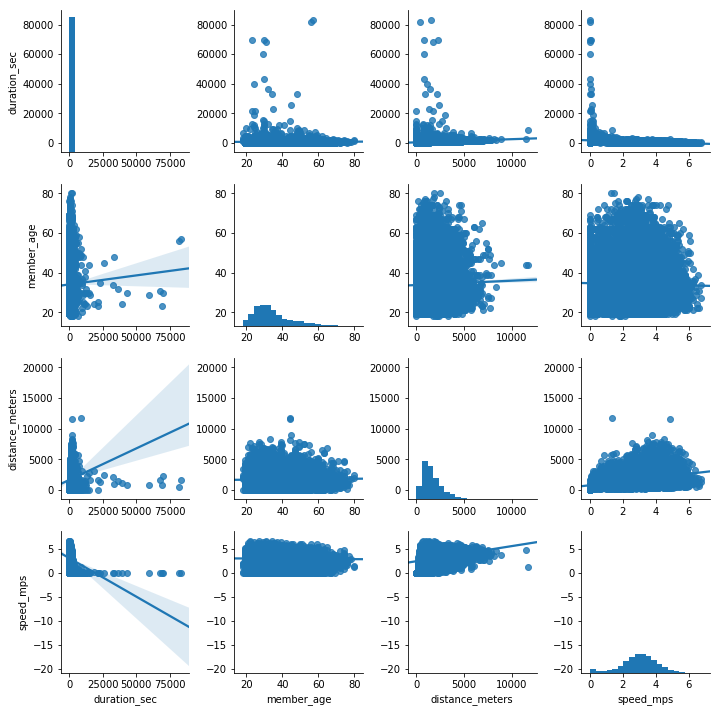

In [11]:
# plot matrix of numeric features.
sample_df = df.sample(n=20000, replace = False)
g = sb.PairGrid(data = sample_df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.regplot);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 685731 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 